In [2]:
import pandas as pd
#matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

covid_data = pd.read_csv('google_new3.csv',sep=";")

In [3]:
str_column =['iso','country','residential']
target_column = ['total_cases','fatalities'] 
predictors = list(set(list(covid_data.columns))-set(target_column)-set(str_column))
covid_data[predictors] = covid_data[predictors]
print(covid_data.columns)
covid_data.describe().transpose()

Index(['iso', 'country', 'date', 'grocery_pharmacy', 'parks', 'residential',
       'retail_recreation', 'transit_stations', 'workplaces', 'total_cases',
       'fatalities'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
date,817.0,22.000000,12.417275,1.000,11.000,22.000,33.000,43.000
grocery_pharmacy,817.0,-8.229424,21.313369,-84.798,-16.578,0.088,4.838,59.474
parks,817.0,-13.394035,32.891636,-91.456,-32.841,-6.498,6.961,75.002
residential,817.0,9.545845,10.545377,-3.647,0.744,5.912,16.695,40.343
retail_recreation,817.0,-26.205257,30.992728,-95.158,-49.975,-14.427,-0.632,19.699
transit_stations,817.0,-28.370122,30.211025,-88.956,-54.145,-19.502,-0.970,16.822
workplaces,817.0,-19.126192,25.983021,-79.293,-40.582,-8.395,1.037,21.347
total_cases,817.0,10699.773562,31656.464952,0.000,27.000,648.000,4585.000,336912.000
fatalities,817.0,566.007344,2008.520488,0.000,0.000,6.000,79.000,15887.000


In [4]:
EU_covid_data = covid_data.loc[((covid_data['country'] == 'Germany') 
                               | (covid_data['country'] == 'Spain')
                               | (covid_data['country'] == 'France')
                               | (covid_data['country'] == 'United Kingdom')
                               | (covid_data['country'] == 'Italy')
                               | (covid_data['country'] == 'Sweden'))]

AM_covid_data = covid_data.loc[((covid_data['country'] == 'Argentina')
                                | (covid_data['country'] == 'Canada')
                                | (covid_data['country'] == 'Mexico')
                                | (covid_data['country'] == 'US')
                                | (covid_data['country'] == 'Brazil'))]

AS_OC_covid_data = covid_data.loc[((covid_data['country'] == 'Indonesia')
                               | (covid_data['country'] == 'India')
                               | (covid_data['country'] == 'Japan')
                               | (covid_data['country'] == 'South Korea')
                               | (covid_data['country'] == 'Australia'))]

AF_covid_data = covid_data.loc[((covid_data['country'] == 'South Africa') 
                                | (covid_data['country'] == 'Saudi Arabia')
                                | (covid_data['country'] == 'Turkey'))]

In [5]:
X=EU_covid_data[predictors]
Y1=EU_covid_data["total_cases"]
Y2=EU_covid_data["fatalities"]

X_train, X_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.30, random_state=40)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.30, random_state=40)

print(X_train.shape)
print(X_test.shape)

(180, 6)
(78, 6)


In [6]:
mlp = MLPRegressor(hidden_layer_sizes=(8,8), activation='relu', solver='adam', max_iter=50000)
mlp.fit(X_train,y1_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [7]:
print(mean_squared_error(y1_train,predict_train))
print(r2_score(y1_train,predict_train))

16979257.996914785
0.9834390495520963


In [8]:
print(mean_squared_error(y1_test,predict_test))
print(r2_score(y1_test,predict_test))

77879634.06756164
0.9330045241613849


In [9]:
mlp = MLPRegressor(hidden_layer_sizes=(8,8), activation='relu', solver='adam', max_iter=50000)
mlp.fit(X2_train,y2_train)

predict_train2 = mlp.predict(X2_train)
predict_test2 = mlp.predict(X2_test)

In [10]:
print(mean_squared_error(y2_train,predict_train2))
print(r2_score(y2_train,predict_train2))

63022.2133731395
0.9932886157624792


In [11]:
print(mean_squared_error(y2_test,predict_test2))
print(r2_score(y2_test,predict_test2))

372574.71167672233
0.96905129013478


In [42]:
regr_2 = MLPRegressor(hidden_layer_sizes=(8,8), activation='relu', solver='adam', max_iter=50000)

test2_regr = ['date']

regr_2.fit(EU_covid_data[test2_regr], EU_covid_data['total_cases'])

regr_3 = MLPRegressor(hidden_layer_sizes=(8,8), activation='relu', solver='adam', max_iter=50000)

test3_regr = ['date']

regr_3.fit(EU_covid_data[test2_regr], EU_covid_data['fatalities'])




MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(8, 8), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=50000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

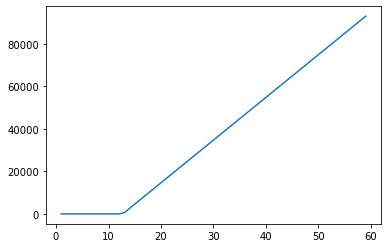

In [40]:
import numpy as np

b=np.arange(1,60)
a=np.arange(1,60)

for i in range(59):
    b[i]=regr_2.predict([[a[i]]])[0]
    
plt.plot(a,b)
    


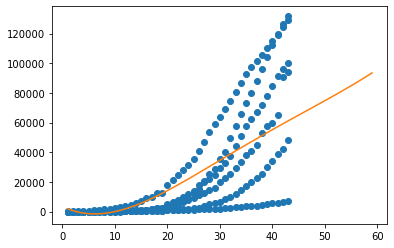

In [41]:
from scipy.interpolate import *

poly = np.poly1d(np.polyfit(a,b,5))
y = poly(a)

plt.plot(EU_covid_data["date"], EU_covid_data["total_cases"], "o", a, y)

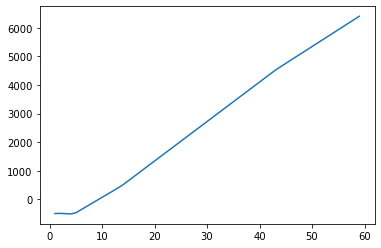

In [45]:
b=np.arange(1,60)
a=np.arange(1,60)

for i in range(59):
    b[i]=regr_3.predict([[a[i]]])[0]
    
plt.plot(a,b)

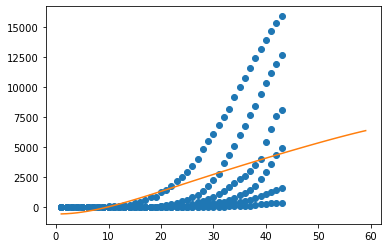

In [49]:
poly = np.poly1d(np.polyfit(a,b,5))
y = poly(a)

plt.plot(EU_covid_data["date"], EU_covid_data["fatalities"], "o", a, y)